#### Importing Packages

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression

#### Data Acquisition and Analysis

In [26]:
data = pd.read_csv('./data/diabetes.csv', header=None)

In [27]:
print("Data shape:", data.shape)
print("First few rows of the dataset:")
print(data.head())

Data shape: (768, 9)
First few rows of the dataset:
   0  1    2   3   4    5     6      7   8
0  1  6  148  72  35    0  33.6  0.627  50
1  0  1   85  66  29    0  26.6  0.351  31
2  1  8  183  64   0    0  23.3  0.672  32
3  0  1   89  66  23   94  28.1  0.167  21
4  1  0  137  40  35  168  43.1  2.288  33


In [28]:
print(data.describe()) 

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.348958    3.845052  120.894531   69.105469   20.536458   79.799479   
std      0.476951    3.369578   31.972618   19.355807   15.952218  115.244002   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    1.000000   99.000000   62.000000    0.000000    0.000000   
50%      0.000000    3.000000  117.000000   72.000000   23.000000   30.500000   
75%      1.000000    6.000000  140.250000   80.000000   32.000000  127.250000   
max      1.000000   17.000000  199.000000  122.000000   99.000000  846.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885  
std      7.884160    0.331329   11.760232  
min      0.000000    0.078000   21.000000  
25%     27.300000    0.243750   24.000000  
50%   

In [29]:
# Checking for any missing values in the original data set
missing_values = data.isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


#### Data Preparation

In [30]:
X = data.iloc[:, 1:].to_numpy()  # All columns except the first one (features)
y = data.iloc[:, 0].to_numpy()   # First column as the labels

# Print the shape of X and y to verify
print("Features shape (X):", X.shape)
print("Labels shape (y):", y.shape)

Features shape (X): (768, 8)
Labels shape (y): (768,)


In [31]:
# Checking for data immbalance 
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 500, 1: 268}


The above code illustrates that there is an imbalance in data. The data is more biased towards 0 labels than 1. To handle this situation, the model was trained with two approaches. 1 - Model development by adding weights  2. Model development by introducing Focal loss. 

In [32]:
# Scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
print("Features shape (X_Scaled):", X_scaled.shape)

Features shape (X_Scaled): (768, 8)


In [34]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Define a single-layer perception model

In [36]:
model = Sequential()

In [37]:
model.add(Input(shape=(8,)))

In [38]:
# Parameters

Activation_func = "sigmoid"
learning_rate = 0.001
Momentum = 0.9
Loss_gamma = 1.5
Loss_alpha = 0.35
Epochs = 50
Batch_size = 32
Optimizer = 'SGD'

In [39]:
#Adding One Dense Layer to build single layer perceptron
model.add(Dense(1, activation=Activation_func))

In [40]:
optimizer = SGD(learning_rate=learning_rate , momentum=Momentum)
#optimizer = Adam(learning_rate=0.01)

###### Defining a Loss Function

In [41]:
def focal_loss(gamma, alpha):
    """
    Focal Loss for binary classification.
    
    Parameters:
    gamma -- focusing parameter 
    alpha -- weight factor for the positive class 
    """
    def focal_loss_fixed(y_true, y_pred):
        # Clip predictions to prevent log(0)
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        
        # Cross entropy
        cross_entropy = -y_true * tf.math.log(y_pred)
        
        # Modulating factor (1 - p_t)^gamma
        modulating_factor = tf.pow(1. - y_pred, gamma)
        
        # Apply alpha weighting
        loss = alpha * modulating_factor * cross_entropy
        
        return tf.reduce_sum(loss, axis=-1)
    
    return focal_loss_fixed

In [42]:
# Compile the model with focal loss
model.compile(optimizer=optimizer, loss=focal_loss(gamma=Loss_gamma, alpha=Loss_alpha), metrics=['accuracy'])

#### Model Training and Tuning

In [43]:
# Train the model
history1 = model.fit(X_train, y_train, epochs= Epochs, batch_size=Batch_size , validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5983 - loss: 0.0563 - val_accuracy: 0.5447 - val_loss: 0.0585
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6042 - loss: 0.0557 - val_accuracy: 0.5528 - val_loss: 0.0578
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6042 - loss: 0.0549 - val_accuracy: 0.5610 - val_loss: 0.0570
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6105 - loss: 0.0540 - val_accuracy: 0.5610 - val_loss: 0.0562
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6054 - loss: 0.0532 - val_accuracy: 0.5610 - val_loss: 0.0554
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6070 - loss: 0.0524 - val_accuracy: 0.5610 - val_loss: 0.0547
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6095 - loss: 0.0516 - val_accuracy: 0.5610 - val_loss: 0.0539
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6095 - loss: 0.0508 - val_accuracy: 0.5610 - val_loss

#### Model evaluation and Validation

In [44]:
y_pred2 = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred2, zero_division=1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.90      0.53      0.66        99
           1       0.51      0.89      0.65        55

    accuracy                           0.66       154
   macro avg       0.70      0.71      0.66       154
weighted avg       0.76      0.66      0.66       154



In [45]:
import logging
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
Model_Results =1
test_loss1, test_accuracy1 = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy1*100:.4f}')
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
logging.basicConfig(filename='Model_Results.log')
Model_Results = f'Experiment Number #{Model_Results}\n Activation Function : {Activation_func},\n Optimizer : {Optimizer},\n Learning Rate : {learning_rate},\n Momentum : {Momentum},\n Epochs = {Epochs},\n Batch Size : {Batch_size},\n Gamma : {Loss_gamma},\n Alpha : {Loss_alpha},\n Accuracy = {test_accuracy1 * 100:.4f},\n Precision = {precision*100:4f},\n Recall = {recall*100:4f},\n F1_Score = {f1*100:4f} \n\n'
logging.critical(Model_Results)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6301 - loss: 0.0143 
Test Accuracy: 65.5844


In [46]:
print(confusion_matrix(y_test, y_pred2))

[[52 47]
 [ 6 49]]


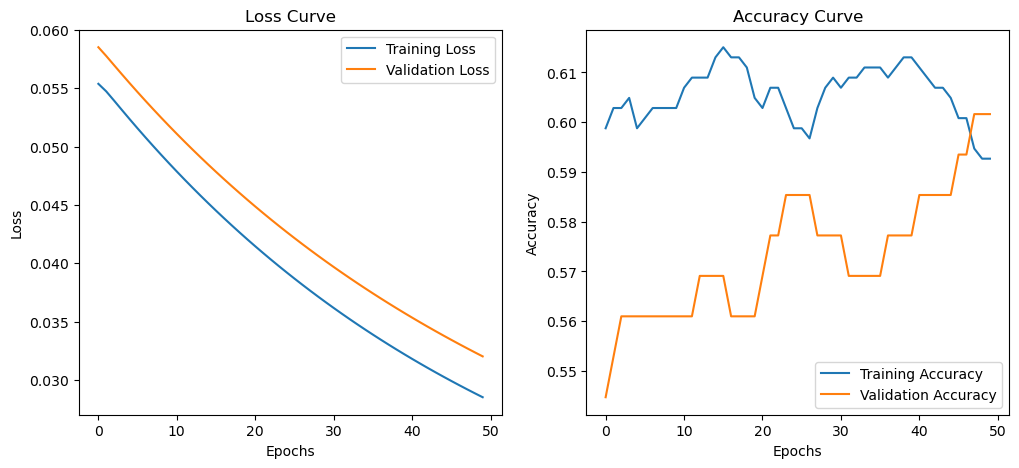

In [47]:
plt.figure(figsize=(12, 5))

# Plot Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()